In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv('data.csv')

print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [10]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [16]:
grouped_df  = (
    df.groupby('Дата')['Количество']
      .sum()
      .reset_index(name='Количество_продаж')
)

Вывести несколько первых строк сгруппированных данных

In [18]:
grouped_df.head()

,Дата,Количество_продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

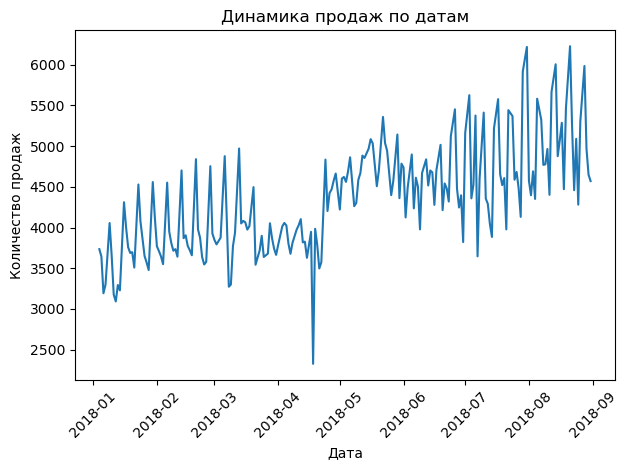

In [20]:
plt.figure()
plt.plot(grouped_df['Дата'], grouped_df['Количество_продаж'])
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('Динамика продаж по датам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
На графике изображена динамика продаж во времени, где по оси X отложены даты, а по оси Y - общее количество продаж 
за каждый день. Продажи распределены неравномерно: значения по дням заметно колеблются, 
что указывает на высокую волатильность спроса. График не является гладким - присутствуют резкие подъёмы и спады, 
характерные для реальных операционных данных.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [22]:
# найдем границу выбросов (IQR)
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

In [24]:
# находим выбросы

outliers = df[df['Количество'] > upper_bound]

In [26]:
# максимальный выброс
max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

print(max_outlier_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [28]:
# Фильтруем данные по условиям

filtered_df = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2)  # 2 = среда
]

In [30]:
# Группируем по товару и считаем продажи
product_sales = (
    filtered_df
    .groupby('Номенклатура')['Количество']
    .sum()
    .reset_index()
)

In [32]:
# Находим топовый товар
top_product = product_sales.loc[
    product_sales['Количество'].idxmax()
]

print(top_product)

Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [160]:
weather = pd.read_excel("weather.xlsx")

weather.head()

,Дата,T
0,2018-08-31,9.6
1,2018-08-31,11.3
2,2018-08-31,12.3
3,2018-08-31,13.2
4,2018-08-31,12.5


In [162]:
weather['Дата'] = pd.to_datetime(weather['Дата'])
weather.dtypes


Дата    datetime64[ns]
T              float64
dtype: object

In [166]:
weather['Дата_день'] = weather['Дата'].dt.date


In [168]:
weather_daily = (
    weather
    .groupby('Дата_день', as_index=False)
    .agg(T=('T', 'mean'))
)


In [170]:
weather_daily.rename(columns={'Дата_день': 'Дата'}, inplace=True)
weather_daily.head()


,Дата,T
0,2018-01-04,-13.0875
1,2018-01-05,-17.2500
2,2018-01-06,-14.1250
3,2018-01-07,-12.3375
4,2018-01-08,-15.4375


In [176]:
weather_daily['Дата'] = pd.to_datetime(weather_daily['Дата']).dt.date
weather_daily.head()


,Дата,T
0,2018-01-04,-13.0875
1,2018-01-05,-17.2500
2,2018-01-06,-14.1250
3,2018-01-07,-12.3375
4,2018-01-08,-15.4375


In [178]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date
grouped_df.head()


,Дата,Количество_продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


In [180]:
df = pd.merge(
    grouped_df,
    weather_daily,
    on='Дата',
    how='inner'
)

df.head()


,Дата,Количество_продаж,T
0,2018-01-04,3734,-13.0875
1,2018-01-05,3643,-17.2500
2,2018-01-06,3193,-14.1250
3,2018-01-07,3298,-12.3375
4,2018-01-09,4055,-7.3875


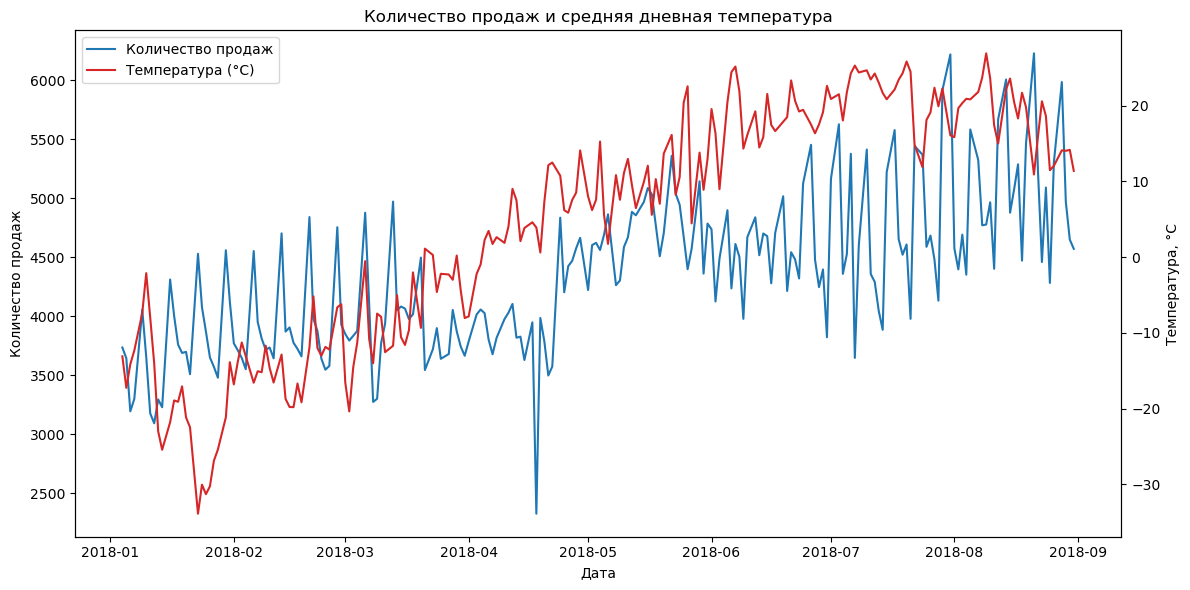

In [196]:
fig, ax1 = plt.subplots(figsize=(12,6))

# продажи
ax1.plot(df['Дата'], df['Количество_продаж'], color='tab:blue', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж')

# температура
ax2 = ax1.twinx()
ax2.plot(df['Дата'], df['T'],color='tab:red', label='Температура (°C)')
ax2.set_ylabel('Температура, °C')

plt.title('Количество продаж и средняя дневная температура')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()